# Exploring the StarFlow catalog for MWM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

from utils import fits_to_pandas, galactic_to_galactocentric
import paths

## Join MWM DR19 with StarFlow ages

In [3]:
# Get MWM data (takes a few seconds)
mwm_hdul = fits.open(paths.data / 'MWM' / 'astraAllStarASPCAP-0.6.0.fits.gz')
mwm_hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
                                                                                
        Metadata                                                                
                                                                                
PIPELINE= 'ASPCAP  '           / Pipeline name                                  
V_ASTRA = '0.6.0   '           / Astra version                                  
CREATED = '24-10-28 14:23:20'  / File creation time (UTC %y-%m-%d %H:%M:%S)     
                                                                                
        HDU Descriptions                                                        
                            

In [4]:
mwm_hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2068 / length of dimension 1                          
NAXIS2  =              1095480 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  396 / number of table fields                         
                                                                                
        Metadata                                                                
                                                                                
INSTRMNT= 'APOGEE  '           / Instrument                                     
PIPELINE= 'ASPCAP  '        

In [5]:
# Get StarFlow ages
starflow_hdul = fits.open(paths.data / 'MWM' / 'StarFlow_summary_v1_0_0.fits')
starflow_hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   91 / length of dimension 1                          
NAXIS2  =              1059521 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
EXTNAME = 'STARFLOW_TABLE'     / extension name                                 
TTYPE1  = 'sdss_id '           / Unique SDSS-V ID                               
TFORM1  = 'K       '                                                            
TTYPE2  = 'sdss4_apogee_id'    / 2MASS ID                                       
TFORM2  = '19A     '        

In [6]:
# Import MWM data (takes a while)
mwm = fits_to_pandas(paths.data / 'MWM' / 'astraAllStarASPCAP-0.6.0.fits.gz', hdu=2)
mwm

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_si_h,raw_e_si_h,raw_s_h,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h
0,85995134,19140272-1554055,4184200643491196928,4184200643505162112,7167051,125082,gaia_dr3_source,31,63050395561720686,5073182676,...,0.018572,0.003024,-0.084132,0.002980,0.078260,0.003073,NaN,NaN,-0.783540,0.001510
1,85993595,19155129-1617591,4184125807991900928,4184125807991900928,130289670,125595,gaia_dr3_source,31,63050395561662195,5073154844,...,0.059691,0.005654,0.079489,0.005673,0.104910,0.005698,NaN,NaN,-0.831350,0.002483
2,83888336,19170343-1703138,4087762027643173248,4087762031955829120,391063280,127131,gaia_dr3_source,31,63050395374745099,5070549038,...,0.086418,0.007297,-0.019033,0.007198,0.075462,0.007284,NaN,NaN,-0.018914,0.003040
3,85993872,19171130-1603082,4184137077986034048,4184137077986034048,391138912,125595,gaia_dr3_source,31,63050395561671356,5073418501,...,-0.070683,0.020903,0.231997,0.021472,0.133338,0.021273,NaN,NaN,-1.163100,0.008814
4,85990324,19180978-1616222,4183930438518525184,4183930438518525184,130700676,126107,gaia_dr3_source,31,63050395561533253,5073422656,...,0.153960,0.006191,0.148035,0.006184,0.146222,0.006182,NaN,NaN,-0.542530,0.002754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,-0.383291,0.001458,-0.333470,0.001471,-0.473603,0.001434,NaN,NaN,-1.237000,0.000660
1095476,86425128,NaN,4218839894034321280,4218839894034321280,244098458,107697,tic_v8,25,27021598723976601,5167362980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095477,86679734,NaN,4243648106171993600,4243648106171993600,256490233,94894,tic_v8,25,27021599488157093,5310658412,...,0.090700,0.027178,0.538840,0.024441,-0.640360,0.036485,NaN,NaN,0.999790,0.007931
1095478,62976634,2M21281456+0645030,1739061738807205760,1739061738807205760,305040006,86730,gaia_dr3_source,31,63050394856548928,4377212753,...,0.111889,0.005085,-0.003702,0.004981,0.158950,0.005124,NaN,NaN,-0.480260,0.002292


In [7]:
# Quality & duplication cuts
mwm = mwm[
    (mwm['sdss4_apogee_extra_target_flags'] == 0) &
    (mwm['flag_bad'] == 0) & 
    (mwm['spectrum_flags'] == 0) &
    (mwm['snr'] > 40)
].copy()
mwm

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_si_h,raw_e_si_h,raw_s_h,raw_e_s_h,raw_ti_h,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h
6,69701733,2M00000019-1924498,2413929812587459072,2413929812587459072,114807664,130304,gaia_dr3_source,31,63050395064590440,4373438107,...,-0.238637,0.004189,-0.181977,0.004158,-0.052960,0.004103,NaN,NaN,0.001722,0.001158
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,-0.159274,0.005321,-0.076610,0.005211,-0.560280,0.005938,NaN,NaN,-0.274910,0.002149
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,-0.131428,0.002378,-0.178374,0.002373,-0.103696,0.002380,NaN,NaN,-0.067486,0.000879
11,71533706,2M00000103+1525513,2772097619417608704,2772097619417608704,238280680,71936,gaia_dr3_source,31,63050395073693238,4400240521,...,-0.266894,0.007702,-0.282206,0.007728,-0.198839,0.007591,NaN,NaN,-0.635040,0.003547
17,54395899,2M00000446+5854329,422775384964691328,422775384964691328,346456229,14280,gaia_dr3_source,31,63050394783674290,4293344382,...,-0.059351,0.003916,-0.061365,0.003914,-0.049902,0.003924,NaN,NaN,-0.376160,0.001653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095471,65917316,NaN,2015148219486989184,2015148219486989184,268848889,11693,tic_v8,25,27021597815725630,4256291486,...,-0.252046,0.002760,-0.184791,0.002811,-0.111860,0.002921,NaN,NaN,-0.485770,0.001238
1095472,88019911,NaN,4312594391538603520,4312594391538603520,223642364,79511,tic_v8,25,27021599488271306,5243840633,...,0.229145,0.003844,0.171051,0.003803,0.323761,0.003899,NaN,NaN,0.520160,0.001741
1095474,66083125,NaN,2022868990189037824,2022868990189037824,112158028,57503,tic_v8,25,27021598861941328,5305580894,...,-0.317740,0.001816,-0.231350,0.001885,-0.366020,0.001793,NaN,NaN,-0.616610,0.000846
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,-0.383291,0.001458,-0.333470,0.001471,-0.473603,0.001434,NaN,NaN,-1.237000,0.000660


In [8]:
# Calculate galactocentric coordinates based on galactic l, b and Gaia dist
galr, galphi, galz = galactic_to_galactocentric(
    mwm['l'], mwm['b'], mwm['r_med_photogeo']/1000
)
mwm['galr'] = galr # kpc
mwm['galphi'] = galphi # deg
mwm['galz'] = galz # kpc

In [9]:
# Calculate [O/Fe]
mwm['o_fe'] = mwm['o_h'] - mwm['fe_h']
mwm['e_o_fe'] = np.sqrt(mwm['e_o_h']**2 + mwm['e_fe_h']**2)

In [10]:
# There are some MWM stars with duplicate entries
mwm[mwm.duplicated(subset='sdss_id', keep=False)]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h,galr,galphi,galz,o_fe,e_o_fe
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.001458,NaN,NaN,-0.438700,0.000524,10.782479,158.585484,-0.375022,0.128490,0.015377
19,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.001497,NaN,NaN,-0.317140,0.000515,10.782479,158.585484,-0.375022,0.138260,0.015410
152,54487391,2M00004407+6151569,429529650538808576,429529650538808576,417860131,11704,gaia_dr3_source,31,63050394786420238,4294497545,...,0.001266,NaN,NaN,-0.402150,0.000575,11.254958,157.010770,-0.009612,0.013708,0.015252
264,55747423,2M00010922+8528011,573643532933414144,573643532933414144,461577327,312,gaia_dr3_source,31,63050394817327868,4326193561,...,0.005495,NaN,NaN,-0.319480,0.001883,11.178237,159.941171,1.915231,0.115940,0.018979
309,71368756,2M00011994+0053361,2738305843228689408,2738305843228689408,257487511,96512,gaia_dr3_source,31,63050395072951721,4399103052,...,0.002612,NaN,NaN,0.412310,0.000939,8.144915,178.909849,-0.244525,0.006223,0.016404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094486,70819969,2M23465348-0113200,2641698014263746176,2641698014263746176,398618796,100603,gaia_dr3_source,31,63050395069139769,4371177786,...,0.008098,NaN,NaN,-0.618870,0.003454,8.121803,179.644298,-0.065910,-0.041132,0.021477
1094548,86517904,2M20452267+0012192,4228018655756850816,4228018655756850816,466903240,97979,gaia_dr3_source,31,63050395591354846,5318080122,...,0.006004,NaN,NaN,-0.667050,0.002889,5.954373,134.279457,-2.707920,0.273240,0.019722
1094583,71012821,2M22234708+0035149,2678457879140338560,2678457879140338560,265857994,97501,gaia_dr3_source,31,63050395070254633,4381171694,...,0.002264,NaN,NaN,0.019516,0.000719,8.092950,179.556557,-0.048440,0.069429,0.016034
1094680,70692223,2M22110204-0954548,2615757850609259904,2615757850609259904,38155149,115417,gaia_dr3_source,31,63050395068446240,4368109325,...,0.006014,NaN,NaN,-0.382680,0.002705,7.831325,177.418022,-0.503606,0.064464,0.019550


In [11]:
pd.set_option('display.max_columns', None)
mwm[mwm['sdss_id'] == 54393951]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,catalogid25,catalogid31,n_associated,n_neighborhood,sdss4_apogee_target1_flags,sdss4_apogee_target2_flags,sdss4_apogee2_target1_flags,sdss4_apogee2_target2_flags,sdss4_apogee2_target3_flags,sdss4_apogee_member_flags,sdss4_apogee_extra_target_flags,ra,dec,l,b,plx,e_plx,pmra,e_pmra,pmde,e_pmde,gaia_v_rad,gaia_e_v_rad,g_mag,bp_mag,rp_mag,j_mag,e_j_mag,h_mag,e_h_mag,k_mag,e_k_mag,ph_qual,bl_flg,cc_flg,w1_mag,e_w1_mag,w1_flux,w1_dflux,w1_frac,w2_mag,e_w2_mag,w2_flux,w2_dflux,w2_frac,w1uflags,w2uflags,w1aflags,w2aflags,mag4_5,d4_5m,rms_f4_5,sqf_4_5,mf4_5,csf,zgr_teff,zgr_e_teff,zgr_logg,zgr_e_logg,zgr_fe_h,zgr_e_fe_h,zgr_e,zgr_e_e,zgr_plx,zgr_e_plx,zgr_teff_confidence,zgr_logg_confidence,zgr_fe_h_confidence,zgr_ln_prior,zgr_chi2,zgr_quality_flags,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,bailer_jones_flags,ebv,e_ebv,ebv_flags,ebv_zhang_2023,e_ebv_zhang_2023,ebv_sfd,e_ebv_sfd,ebv_rjce_glimpse,e_ebv_rjce_glimpse,ebv_rjce_allwise,e_ebv_rjce_allwise,ebv_bayestar_2019,e_ebv_bayestar_2019,ebv_edenhofer_2023,e_ebv_edenhofer_2023,c_star,u_jkc_mag,u_jkc_mag_flag,b_jkc_mag,b_jkc_mag_flag,v_jkc_mag,v_jkc_mag_flag,r_jkc_mag,r_jkc_mag_flag,i_jkc_mag,i_jkc_mag_flag,u_sdss_mag,u_sdss_mag_flag,g_sdss_mag,g_sdss_mag_flag,r_sdss_mag,r_sdss_mag_flag,i_sdss_mag,i_sdss_mag_flag,z_sdss_mag,z_sdss_mag_flag,y_ps1_mag,y_ps1_mag_flag,n_boss_visits,boss_min_mjd,boss_max_mjd,n_apogee_visits,apogee_min_mjd,apogee_max_mjd,source,star_pk,spectrum_pk,release,filetype,apred,apstar,obj,telescope,field,prefix,min_mjd,max_mjd,n_entries,n_visits,n_good_visits,n_good_rvs,snr,mean_fiber,std_fiber,spectrum_flags,v_rad,e_v_rad,std_v_rad,median_e_v_rad,doppler_teff,doppler_e_teff,doppler_logg,doppler_e_logg,doppler_fe_h,doppler_e_fe_h,doppler_rchi2,doppler_flags,xcorr_v_rad,xcorr_v_rel,xcorr_e_v_rel,ccfwhm,autofwhm,n_components,task_pk,source_pk,v_astra,created,t_elapsed,t_overhead,tag,irfm_teff,irfm_teff_flags,teff,e_teff,logg,e_logg,v_micro,e_v_micro,v_sini,e_v_sini,m_h_atm,e_m_h_atm,alpha_m_atm,e_alpha_m_atm,c_m_atm,e_c_m_atm,n_m_atm,e_n_m_atm,al_h,e_al_h,al_h_flags,al_h_rchi2,c_12_13,e_c_12_13,c_12_13_flags,c_12_13_rchi2,ca_h,e_ca_h,ca_h_flags,ca_h_rchi2,ce_h,e_ce_h,ce_h_flags,ce_h_rchi2,c_1_h,e_c_1_h,c_1_h_flags,c_1_h_rchi2,c_h,e_c_h,c_h_flags,c_h_rchi2,co_h,e_co_h,co_h_flags,co_h_rchi2,cr_h,e_cr_h,cr_h_flags,cr_h_rchi2,cu_h,e_cu_h,cu_h_flags,cu_h_rchi2,fe_h,e_fe_h,fe_h_flags,fe_h_rchi2,k_h,e_k_h,k_h_flags,k_h_rchi2,mg_h,e_mg_h,mg_h_flags,mg_h_rchi2,mn_h,e_mn_h,mn_h_flags,mn_h_rchi2,na_h,e_na_h,na_h_flags,na_h_rchi2,nd_h,e_nd_h,nd_h_flags,nd_h_rchi2,ni_h,e_ni_h,ni_h_flags,ni_h_rchi2,n_h,e_n_h,n_h_flags,n_h_rchi2,o_h,e_o_h,o_h_flags,o_h_rchi2,p_h,e_p_h,p_h_flags,p_h_rchi2,si_h,e_si_h,si_h_flags,si_h_rchi2,s_h,e_s_h,s_h_flags,s_h_rchi2,ti_h,e_ti_h,ti_h_flags,ti_h_rchi2,ti_2_h,e_ti_2_h,ti_2_h_flags,ti_2_h_rchi2,v_h,e_v_h,v_h_flags,v_h_rchi2,short_grid_name,continuum_order,continuum_reject,interpolation_order,initial_flags,rchi2,ferre_log_snr_sq,ferre_time_elapsed,result_flags,flag_warn,flag_bad,stellar_parameters_task_pk,al_h_task_pk,c_12_13_task_pk,ca_h_task_pk,ce_h_task_pk,c_1_h_task_pk,c_h_task_pk,co_h_task_pk,cr_h_task_pk,cu_h_task_pk,fe_h_task_pk,k_h_task_pk,mg_h_task_pk,mn_h_task_pk,na_h_task_pk,nd_h_task_pk,ni_h_task_pk,n_h_task_pk,o_h_task_pk,p_h_task_pk,si_h_task_pk,s_h_task_pk,ti_h_task_pk,ti_2_h_task_pk,v_h_task_pk,calibrated_flags,mass,radius,raw_teff,raw_e_teff,raw_logg,raw_e_logg,raw_v_micro,raw_e_v_micro,raw_v_sini,raw_e_v_sini,raw_m_h_atm,raw_e_m_h_atm,raw_alpha_m_atm,raw_e_alpha_m_atm,raw_c_m_atm,raw_e_c_m_atm,raw_n_m_atm,raw_e_n_m_atm,raw_al_h,raw_e_al_h,raw_c_12_13,raw_e_c_12_13,raw_ca_h,raw_e_ca_h,raw_ce_h,raw_e_ce_h,raw_c_1_h,raw_e_c_1_h,raw_c_h,raw_e_c_h,raw_co_h,raw_e_co_h,raw_cr_h,raw_e_cr_h,raw_cu_h,raw_e_cu_h,raw_fe_h,raw_e_fe_h,raw_k_h,raw_e_k_h,raw_mg_h,raw_e_mg_h,raw_mn_h,raw_e_mn_h,raw_na_h,raw_e_

In [12]:
pd.set_option('display.max_columns', 20)
# Temporary fix: use higher SNR
mwm.sort_values('snr', inplace=True)
mwm.drop_duplicates(subset='sdss_id', keep='last', inplace=True)
mwm.sort_index(inplace=True)
mwm

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,raw_e_ti_h,raw_ti_2_h,raw_e_ti_2_h,raw_v_h,raw_e_v_h,galr,galphi,galz,o_fe,e_o_fe
6,69701733,2M00000019-1924498,2413929812587459072,2413929812587459072,114807664,130304,gaia_dr3_source,31,63050395064590440,4373438107,...,0.004103,NaN,NaN,0.001722,0.001158,8.029632,178.619773,-0.841054,0.082645,0.017699
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.005938,NaN,NaN,-0.274910,0.002149,8.483029,175.390522,-0.038939,0.042305,0.018889
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,0.002380,NaN,NaN,-0.067486,0.000879,8.458404,175.658287,-0.040752,0.074813,0.016199
11,71533706,2M00000103+1525513,2772097619417608704,2772097619417608704,238280680,71936,gaia_dr3_source,31,63050395073693238,4400240521,...,0.007591,NaN,NaN,-0.635040,0.003547,8.215045,177.771316,-0.317403,-0.065554,0.021135
17,54395899,2M00000446+5854329,422775384964691328,422775384964691328,346456229,14280,gaia_dr3_source,31,63050394783674290,4293344382,...,0.003924,NaN,NaN,-0.376160,0.001653,10.505169,160.196865,-0.203844,0.015425,0.017615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095471,65917316,NaN,2015148219486989184,2015148219486989184,268848889,11693,tic_v8,25,27021597815725630,4256291486,...,0.002921,NaN,NaN,-0.485770,0.001238,11.563617,152.385215,0.182236,0.019533,0.016614
1095472,88019911,NaN,4312594391538603520,4312594391538603520,223642364,79511,tic_v8,25,27021599488271306,5243840633,...,0.003899,NaN,NaN,0.520160,0.001741,7.996570,179.115035,0.026621,-0.018301,0.017610
1095474,66083125,NaN,2022868990189037824,2022868990189037824,112158028,57503,tic_v8,25,27021598861941328,5305580894,...,0.001793,NaN,NaN,-0.616610,0.000846,6.992823,154.416351,0.217853,0.265550,0.015778
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,0.001434,NaN,NaN,-1.237000,0.000660,9.275192,165.328267,1.117174,0.072952,0.015412


In [13]:
#  Import StarFlow data
starflow = fits_to_pandas(paths.data / 'MWM' / 'StarFlow_summary_v1_0_0.fits')
starflow

,sdss_id,sdss4_apogee_id,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
0,54968703,2M03455109+5955388,5.535536,7.329329,3.713714,0.084372,0.148237,0.006907,1.786528e+10,2
1,116010946,2M03455125+3159498,5.465465,7.497497,3.391391,0.062322,0.125374,-0.011464,1.963289e+10,2
2,114979218,2M03521555+1818064,4.526527,6.418418,2.606607,0.077874,0.136956,0.009470,1.505021e+10,3
3,115031735,2M03521570+2245296,3.223223,5.143143,1.009009,-0.000871,0.146377,-0.238708,8.614447e+08,2
4,114941357,2M03521583+1251133,2.984985,4.442442,1.499499,0.157419,0.221500,0.080051,2.417527e+10,2
...,...,...,...,...,...,...,...,...,...,...
1059516,94596811,2M03484545-1058335,NaN,NaN,NaN,0.001737,0.129269,-0.191596,0.000000e+00,0
1059517,55105597,2M03484564+6905141,14.000000,13.971944,13.158317,0.166411,0.274565,0.014549,6.570968e+06,0
1059518,76059297,2M03484598-0604083,14.000000,13.971944,13.607214,0.123413,0.198976,0.026994,9.323465e-02,0
1059519,116051329,2M03484604+3913412,1.010020,1.935872,0.056112,0.244404,0.302767,0.175220,1.849330e+10,2


In [14]:
# There are also some StarFlow stars with duplicate entries
starflow[starflow.duplicated(subset='sdss_id', keep=False)]

,sdss_id,sdss4_apogee_id,age,e_p_age,e_n_age,mass,e_p_mass,e_n_mass,training_density,BITMASK
18,115030499,2M03521707+2159487,5.885886,7.651652,4.120120,0.090775,0.140749,0.034293,3.498199e+10,3
19,115030499,2M03521707+2159487,6.222222,8.044044,4.414414,0.075686,0.125374,0.019570,3.584928e+10,2
24,91728077,2M03522052-7013280,5.969970,8.114114,3.657658,0.064578,0.125374,-0.006135,1.551985e+10,2
25,91728077,2M03522052-7013280,6.096096,8.226226,3.867868,0.057774,0.117477,-0.014153,1.555576e+10,2
39,115043882,2M03522254+2443417,14.000000,13.985986,13.355355,0.090775,0.215183,-0.103708,2.991221e+01,0
...,...,...,...,...,...,...,...,...,...,...
1059507,116012082,2M03484436+3206590,4.292585,6.172345,2.384770,0.055483,0.142633,-0.056626,8.298608e+09,2
1059508,116012082,2M03484436+3206590,5.358717,7.350701,3.366733,0.036699,0.121443,-0.071760,1.126629e+10,2
1059510,116013775,2M03484452+3253080,4.236473,6.340681,1.963928,-0.022322,0.159232,-0.363647,4.829825e+08,2
1059511,116013775,2M03484452+3253080,3.591182,5.639279,1.346693,-0.019582,0.159232,-0.357656,4.534052e+08,2


In [15]:
# Get sdss_ids
apogee_sdss_id = mwm['sdss_id']
starflow_sdss_id = starflow['sdss_id']

# Check if they are in the other catalog
apogee_in_starflow = np.isin(apogee_sdss_id, starflow_sdss_id)
starflow_in_apogee = np.isin(starflow_sdss_id, apogee_sdss_id)

print(f'There are {np.sum(apogee_in_starflow)} MWM APOGEE targets in StarFlow')
print(f'There are {np.sum(starflow_in_apogee)} StarFlow stars in MWM-APOGEE')

There are 336526 MWM APOGEE targets in StarFlow
There are 362525 StarFlow stars in MWM-APOGEE


In [16]:
# Merge dataframes on sdss_id
mwm_starflow = mwm.join(starflow.set_index('sdss_id'), on='sdss_id', how='inner', rsuffix='_starflow')
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
6,69701733,2M00000019-1924498,2413929812587459072,2413929812587459072,114807664,130304,gaia_dr3_source,31,63050395064590440,4373438107,...,0.017699,2M00000019-1924498,14.000000,13.985986,13.607608,0.101240,0.182141,-0.000871,2.367338e-01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.691692,0.064578,0.125374,-0.006135,1.370802e+01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.789790,0.111459,0.171718,0.041472,3.484089e-01,0
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,0.016199,2M00000068+5710233,6.726727,8.716717,4.764765,0.105357,0.168187,0.031874,3.132123e+09,2
11,71533706,2M00000103+1525513,2772097619417608704,2772097619417608704,238280680,71936,gaia_dr3_source,31,63050395073693238,4400240521,...,0.021135,2M00000103+1525513,14.000000,13.985986,13.789790,0.111459,0.187261,0.017067,1.045463e-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095471,65917316,NaN,2015148219486989184,2015148219486989184,268848889,11693,tic_v8,25,27021597815725630,4256291486,...,0.016614,NaN,2.581162,4.909820,0.028056,-0.084259,0.138856,-0.641196,1.280636e+08,2
1095472,88019911,NaN,4312594391538603520,4312594391538603520,223642364,79511,tic_v8,25,27021599488271306,5243840633,...,0.017610,NaN,12.765531,14.000000,11.531062,0.142633,0.245888,-0.000871,5.058440e+03,0
1095474,66083125,NaN,2022868990189037824,2022868990189037824,112158028,57503,tic_v8,25,27021598861941328,5305580894,...,0.015778,NaN,8.725451,10.997996,6.509018,0.012017,0.187261,-0.307165,1.851610e+09,2
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,0.015412,NaN,8.024048,10.268537,5.807615,0.024533,0.101240,-0.068691,7.613589e+09,2


There are about 60,000 duplicate entries in the resulting DataFrame (around 30,000 unique stars) 

In [17]:
duplicates = mwm_starflow[mwm_starflow.duplicated(subset='sdss_id', keep=False)]
duplicates

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.691692,0.064578,0.125374,-0.006135,1.370802e+01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.789790,0.111459,0.171718,0.041472,3.484089e-01,0
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.015377,2M00000506+5656353,4.232232,6.040040,2.438438,0.094991,0.159232,0.019570,1.405035e+10,2
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.015377,2M00000506+5656353,2.928929,4.442442,1.415415,0.125374,0.193994,0.041472,1.179778e+10,2
23,54487408,2M00000546+6152107,429530195985183744,429530195985183744,417860129,11704,gaia_dr3_source,31,63050394786420552,4294497353,...,NaN,2M00000546+6152107,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095158,65875534,2M23281329+6035400,2012352470660114816,2012352470660114816,378053807,12952,gaia_dr3_source,31,63050394949279876,4256083507,...,0.017293,2M23281329+6035400,3.310621,4.993988,1.571142,0.066822,0.151933,-0.042002,1.178285e+10,2
1095204,68260017,2M21400041+5339325,2174161068579615872,2174161068579615872,394994040,19365,gaia_dr3_source,31,63050395035936354,4243308988,...,0.019495,2M21400041+5339325,1.402806,2.889780,0.000000,0.111459,0.232339,-0.062617,2.283356e+09,2
1095204,68260017,2M21400041+5339325,2174161068579615872,2174161068579615872,394994040,19365,gaia_dr3_source,31,63050395035936354,4243308988,...,0.019495,2M21400041+5339325,2.272545,3.899800,0.673347,0.107400,0.218353,-0.044888,3.679192e+09,2
1095359,88290914,2M19255717+1621170,4322379705736545536,4322379705736545536,68238286,70814,gaia_dr3_source,31,63050395699234387,5287226583,...,0.016022,2M19255717+1621170,3.114228,4.488978,1.767535,0.477121,0.476250,0.424443,1.164059e+08,2


In [18]:
duplicates.sdss_id.unique().shape

(22965,)

In [19]:
mwm_starflow[mwm_starflow['sdss_id'] == 54393951]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.0,13.985986,13.691692,0.064578,0.125374,-0.006135,13.708018,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.0,13.985986,13.789790,0.111459,0.171718,0.041472,0.348409,0


Temporary solution: drop all duplicates after the first entry

In [20]:
mwm_starflow.drop_duplicates(subset='sdss_id', keep='first', inplace=True)
mwm_starflow

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
6,69701733,2M00000019-1924498,2413929812587459072,2413929812587459072,114807664,130304,gaia_dr3_source,31,63050395064590440,4373438107,...,0.017699,2M00000019-1924498,14.000000,13.985986,13.607608,0.101240,0.182141,-0.000871,2.367338e-01,0
8,54393951,2M00000032+5737103,422596679964513792,422596679964513792,346553585,15312,gaia_dr3_source,31,63050394783603525,4291517057,...,0.018889,2M00000032+5737103,14.000000,13.985986,13.691692,0.064578,0.125374,-0.006135,1.370802e+01,0
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,0.016199,2M00000068+5710233,6.726727,8.716717,4.764765,0.105357,0.168187,0.031874,3.132123e+09,2
11,71533706,2M00000103+1525513,2772097619417608704,2772097619417608704,238280680,71936,gaia_dr3_source,31,63050395073693238,4400240521,...,0.021135,2M00000103+1525513,14.000000,13.985986,13.789790,0.111459,0.187261,0.017067,1.045463e-02,0
17,54395899,2M00000446+5854329,422775384964691328,422775384964691328,346456229,14280,gaia_dr3_source,31,63050394783674290,4293344382,...,0.017615,2M00000446+5854329,3.405405,4.960961,1.835836,0.131203,0.193994,0.055483,2.535214e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095471,65917316,NaN,2015148219486989184,2015148219486989184,268848889,11693,tic_v8,25,27021597815725630,4256291486,...,0.016614,NaN,2.581162,4.909820,0.028056,-0.084259,0.138856,-0.641196,1.280636e+08,2
1095472,88019911,NaN,4312594391538603520,4312594391538603520,223642364,79511,tic_v8,25,27021599488271306,5243840633,...,0.017610,NaN,12.765531,14.000000,11.531062,0.142633,0.245888,-0.000871,5.058440e+03,0
1095474,66083125,NaN,2022868990189037824,2022868990189037824,112158028,57503,tic_v8,25,27021598861941328,5305580894,...,0.015778,NaN,8.725451,10.997996,6.509018,0.012017,0.187261,-0.307165,1.851610e+09,2
1095475,69185616,NaN,2291491805490861056,2291491805490861056,237226881,2220,tic_v8,25,27021597845384016,4286064566,...,0.015412,NaN,8.024048,10.268537,5.807615,0.024533,0.101240,-0.068691,7.613589e+09,2


In [21]:
# Use recommended training density cut of 3e9
mwm_starflow_good = mwm_starflow[mwm_starflow['training_density'] >= 3.e9]
mwm_starflow_good

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,0.016199,2M00000068+5710233,6.726727,8.716717,4.764765,0.105357,0.168187,0.031874,3.132123e+09,2
17,54395899,2M00000446+5854329,422775384964691328,422775384964691328,346456229,14280,gaia_dr3_source,31,63050394783674290,4293344382,...,0.017615,2M00000446+5854329,3.405405,4.960961,1.835836,0.131203,0.193994,0.055483,2.535214e+10,2
18,117526639,2M00000506+5656353,421050766615776256,421050766615776256,346555381,16020,gaia_dr3_source,31,63050396594769637,4291456394,...,0.015377,2M00000506+5656353,4.232232,6.040040,2.438438,0.094991,0.159232,0.019570,1.405035e+10,2
26,54393893,2M00000644+5733530,422590632650806272,422590632650806272,346553713,15312,gaia_dr3_source,31,63050394783601151,4291516260,...,0.017192,2M00000644+5733530,3.531532,4.932933,2.102102,0.175220,0.235387,0.103303,2.656532e+10,2
29,54530181,2M00000797+6436119,431771039351005184,431771039351005184,417865355,9384,gaia_dr3_source,31,63050394787619948,4309588745,...,0.018205,2M00000797+6436119,4.862863,6.656657,3.097097,0.086517,0.161038,-0.003495,1.477441e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095437,69193055,NaN,2292959382932423424,2292959382932423424,235686917,2353,tic_v8,25,27021597845430712,4286111787,...,1.131470,NaN,6.256513,7.799599,4.685371,0.150089,0.213590,0.075686,1.207995e+10,2
1095441,65617478,NaN,1997903101165879680,1997903101165879680,345332942,16015,tic_v8,25,27021597811537046,4252094425,...,0.017791,NaN,3.394790,5.218437,1.458918,-0.000871,0.097084,-0.134619,6.657545e+09,2
1095448,68446759,NaN,2189110372255762816,2189110372255762816,429366726,17064,tic_v8,25,27021597828845828,4269468832,...,0.020732,NaN,3.731463,5.106212,2.300601,0.202267,0.273175,0.115480,1.525605e+10,2
1095457,71164351,NaN,2699376332672747008,2699376332672747008,352898012,89804,tic_v8,25,27021599488168649,4377569194,...,0.015154,NaN,5.947896,7.911824,3.815631,0.012017,0.080051,-0.065643,5.773836e+09,2


## Plots!

In [22]:
local_sample = mwm_starflow_good[
    (mwm_starflow_good['galr'] >= 7.) &
    (mwm_starflow_good['galr'] < 9.) &
    (mwm_starflow_good['galz'].abs() < 2.)
]
local_sample

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,lead,version_id,catalogid,catalogid21,...,e_o_fe,sdss4_apogee_id_starflow,age,e_p_age,e_n_age,mass_starflow,e_p_mass,e_n_mass,training_density,BITMASK
10,117526947,2M00000068+5710233,421077597267551104,421077597267551104,346554778,15664,gaia_dr3_source,31,63050396594779936,4291468652,...,0.016199,2M00000068+5710233,6.726727,8.716717,4.764765,0.105357,0.168187,0.031874,3.132123e+09,2
32,55502528,2M00000866+7122144,531274466534134272,531274466534134272,470869376,5100,gaia_dr3_source,31,63050394811844071,4314475663,...,0.015108,2M00000866+7122144,4.274274,5.843844,2.620621,0.136956,0.193994,0.071277,2.996840e+10,2
62,54535769,2M00001962+6502429,432160159079343744,432160159079343744,417861182,9112,gaia_dr3_source,31,63050394787801009,4309844263,...,0.015022,2M00001962+6502429,7.147147,9.095095,5.255255,0.075686,0.123413,0.022059,2.465622e+10,2
76,55750131,2M00002141+8606336,574058839089850368,574058839089850368,461577611,220,gaia_dr3_source,31,63050394817356368,4326211461,...,0.017267,2M00002141+8606336,8.660661,10.524525,6.796797,0.043839,0.094991,-0.014153,3.892091e+09,2
118,71542887,2M00003240+1707161,2773657585898900992,2773657585898900992,456502800,68864,gaia_dr3_source,31,63050395073734680,4400263928,...,0.015050,2M00003240+1707161,7.539540,9.123123,5.969970,0.077874,0.125374,0.024533,1.905674e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095368,66012513,NaN,2020071523329420288,2020071523329420288,361311892,59557,tic_v8,25,27021598863725164,5307365454,...,0.018022,NaN,2.805611,4.460922,1.178357,0.090775,0.188954,-0.039136,7.506912e+09,2
1095421,62960993,NaN,1737172301089629312,1737172301089629312,283642557,85186,tic_v8,25,27021597935411089,4376865376,...,0.017356,NaN,6.901804,8.753507,4.993988,0.026994,0.080051,-0.036288,2.380401e+10,2
1095437,69193055,NaN,2292959382932423424,2292959382932423424,235686917,2353,tic_v8,25,27021597845430712,4286111787,...,1.131470,NaN,6.256513,7.799599,4.685371,0.150089,0.213590,0.075686,1.207995e+10,2
1095448,68446759,NaN,2189110372255762816,2189110372255762816,429366726,17064,tic_v8,25,27021597828845828,4269468832,...,0.020732,NaN,3.731463,5.106212,2.300601,0.202267,0.273175,0.115480,1.525605e+10,2


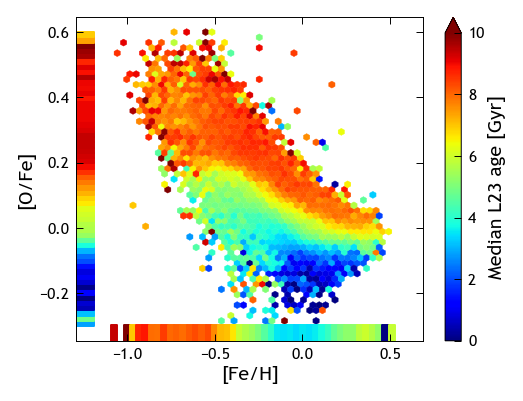

In [23]:
plt.style.use(paths.styles / 'poster.mplstyle')
fig, ax = plt.subplots(figsize=(4, 3), dpi=140)
cmap = 'jet'
# Full abundance plot
pcm0 = ax.hexbin(
    local_sample['fe_h'], local_sample['o_fe'],
    C=local_sample['age'],
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.3, 0.6],
    marginals=True, vmax=10
)
cbar = fig.colorbar(pcm0, ax=ax, orientation='vertical', extend='max')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
plt.show()

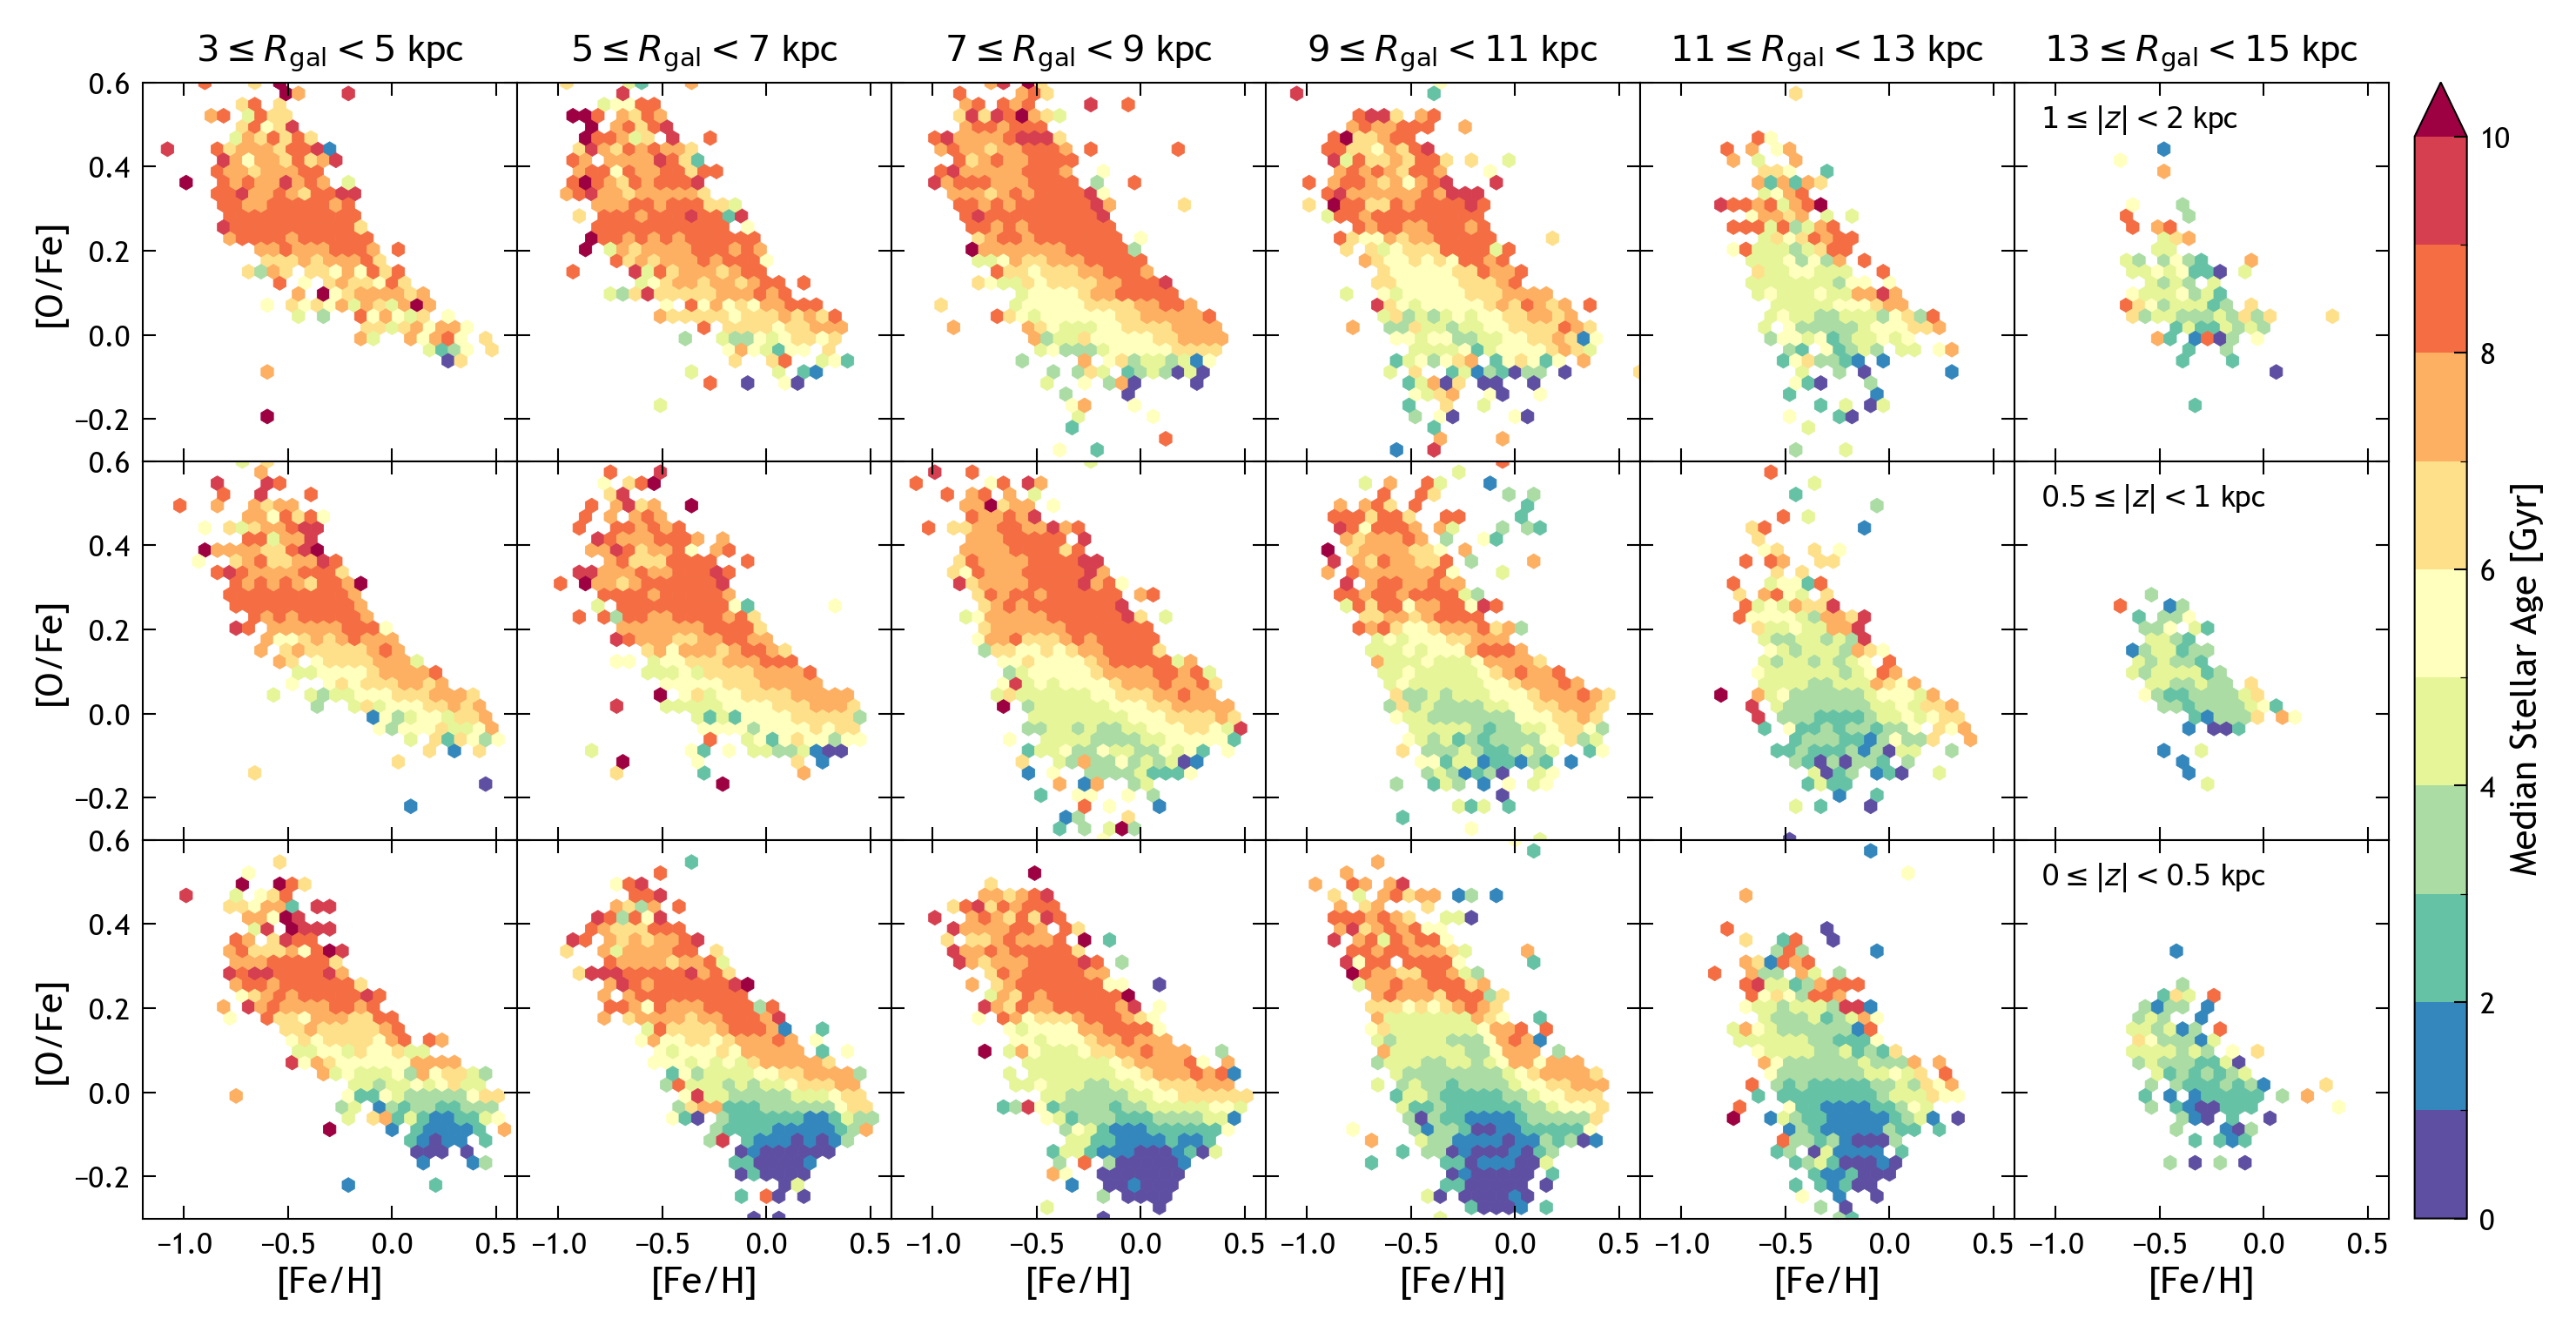

In [24]:
from scatter_plot_grid import setup_axes, setup_colorbar

galr_bins = [3, 5, 7, 9, 11, 13, 15]
absz_bins = [0, 0.5, 1, 2]
cmap = 'Spectral_r'
gridsize = 30
bounds = [-1.2, 0.6, -0.3, 0.6]
vmax = 10

fig, axs = setup_axes(
    galr_bins=galr_bins, absz_bins=absz_bins, 
    xlabel='[Fe/H]', ylabel='[O/Fe]',
    xlim = bounds[:2], ylim=bounds[2:],
    width=10, row_label_col=5
)
cbar = setup_colorbar(
    fig, cmap=cmap, vmax=vmax, label='Median Stellar Age [Gyr]', extend='max', 
    bounds=np.arange(0, 11, 1)
)
for i, row in enumerate(axs):
    absz_lim = (absz_bins[-(i+2)], absz_bins[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (galr_bins[j], galr_bins[j+1])
        subset = mwm_starflow_good[
            (mwm_starflow_good['galr'] >= galr_lim[0]) &
            (mwm_starflow_good['galr'] < galr_lim[1]) &
            (mwm_starflow_good['galz'].abs() >= absz_lim[0]) &
            (mwm_starflow_good['galz'].abs() < absz_lim[1])
        ]
        pcm = ax.hexbin(
            subset['fe_h'], subset['o_fe'],
            C=subset['age'],
            reduce_C_function=np.median,
            gridsize=gridsize, cmap=cbar.cmap, linewidths=0.2,
            extent=bounds, norm=cbar.norm
        )
fig.set_dpi(300)
plt.show()